In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
# Step 2: Load Dataset
df = pd.read_csv("C:\\Users\\ASUS\\Downloads\\customer_reviews.csv")
print("Dataset Preview:")
print(df.head())

Dataset Preview:
                                              review  sentiment
0           I love this product, it works perfectly!          1
1  Worst purchase I have ever made. Completely us...          0
2  Amazing quality and fast delivery. Very satisf...          1
3  Terrible experience, the product broke in a week.          0
4  Good value for the money. Would recommend to o...          1


In [3]:
# Step 3: Preprocessing Function
def clean_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text
    
df['clean_review'] = df['review'].apply(clean_text)
print(df)


                                              review  sentiment  \
0           I love this product, it works perfectly!          1   
1  Worst purchase I have ever made. Completely us...          0   
2  Amazing quality and fast delivery. Very satisf...          1   
3  Terrible experience, the product broke in a week.          0   
4  Good value for the money. Would recommend to o...          1   
5     I am not happy with the product. Disappointed.          0   
6      Excellent customer service and great product!          1   
7        The product does not match the description.          0   
8  Very happy with my purchase. Everything as exp...          1   
9        Do not waste your money. Very poor quality.          0   

                                        clean_review  
0             i love this product it works perfectly  
1  worst purchase i have ever made completely use...  
2   amazing quality and fast delivery very satisfied  
3    terrible experience the product broke

In [4]:
# Step 4: TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['clean_review']).toarray()
y = df['sentiment']

In [5]:
# Step 5: Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


Accuracy: 0.0

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



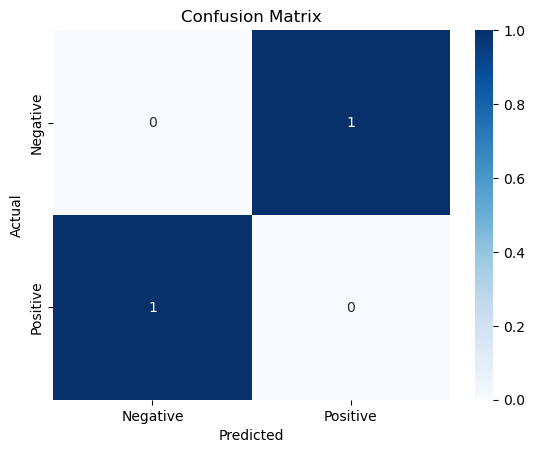

In [6]:

# Step 7: Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [7]:
# Step 8: Predicting New Review
sample_review = ["The product is absolutely fantastic and worth every penny."]
sample_cleaned = [clean_text(r) for r in sample_review]
sample_tfidf = tfidf.transform(sample_cleaned).toarray()

print("Sample Sentiment Prediction:", model.predict(sample_tfidf)[0])

Sample Sentiment Prediction: 1
